### Data Manipulation Source Code For Best Performing Country By Sales

Imported required libraries

In [15]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Defined required SSMS connection properties using python's open database connectivity pyodbc 

In [16]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=ENRIQUE_PC;'
                      'Database=AdventureWorks2019;'
                      'Trusted_Connection=yes;')

In [17]:
cursor = conn.cursor()

Input SQL query to get the appropriate tables from AdventureWorks database

In [18]:
#query = 'SELECT st.CountryRegionCode Country, COUNT(st.SalesLastYear) TotalYearlySale, SUM(st.SalesLastYear) AnnualSale FROM Sales.SalesTerritory st JOIN Sales.Customer c ON st.TerritoryID = c.TerritoryID GROUP BY st.CountryRegionCode ORDER BY TotalYearlySale DESC;'
query = 'SELECT * FROM BestCountryRevenue;'

Load the queried table as a pandas dataframe for analysis and plotting

In [19]:
salesdata = pd.read_sql(query, conn)

C:\Users\eagua\AppData\Local\Temp\ipykernel_27040\1111421933.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salesdata = pd.read_sql(query, conn)


In [20]:
salesdata.head()

,Country,TotalYearlySale,AnnualSale
0,AU,3665,8.350882e+09
1,CA,1791,1.019793e+10
2,DE,1852,2.422323e+09
3,FR,1884,4.515081e+09
4,GB,1991,3.256924e+09


Chose the appropriate plot using the seaborn library to plot annual sales against each country

C:\Users\eagua\AppData\Local\Temp\ipykernel_27040\678618898.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(new_y_ticks, fontsize=9)


[Text(0, 0.0, '0.0'),
 Text(0, 5000000000.0, '0.5B'),
 Text(0, 10000000000.0, '1.0B'),
 Text(0, 15000000000.0, '1.5B'),
 Text(0, 20000000000.0, '2.0B'),
 Text(0, 25000000000.0, '2.5B'),
 Text(0, 30000000000.0, '3.0B'),
 Text(0, 35000000000.0, '3.5B'),
 Text(0, 40000000000.0, '4.0B'),
 Text(0, 45000000000.0, '')]

<Figure size 1000x400 with 0 Axes>

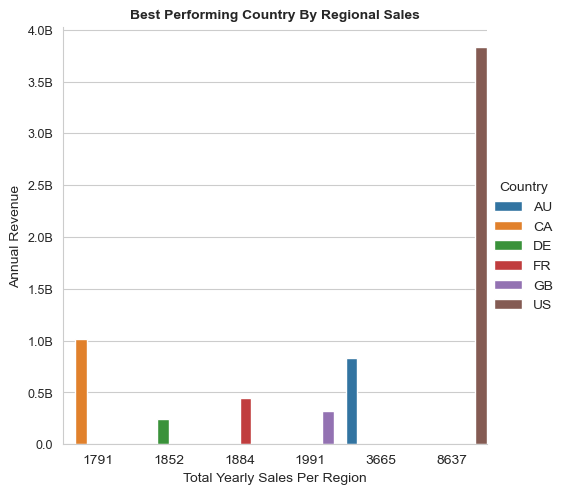

In [21]:
# set and initiate the plot grid and figuresize
sns.set_style("whitegrid")
plt.figure(figsize=(10, 4))

# chose an appropriate catedorical plot
sns.catplot(data=salesdata, x='TotalYearlySale', y='AnnualSale', kind='bar', hue='Country', width=1)

# set the axis labels and title
plt.xlabel('Total Yearly Sales Per Region', fontsize=10)
plt.ylabel('Annual Revenue', fontsize=10)
plt.title('Best Performing Country By Regional Sales', fontsize=10, fontweight='bold')

# reorder the y-axis tixks to be reader friendly
ax = plt.gca()
new_y_ticks = ['0.0', '0.5B', '1.0B', '1.5B', '2.0B', '2.5B', '3.0B', '3.5B', '4.0B']
ax.set_yticklabels(new_y_ticks, fontsize=9)
